# Classification with Neural Networks



This project built a simple neural network trained by backpropagation and gradient descent;
Then use the trained Neural networks to classify data, calculate the classfication accuracy as well.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# sigmoid function
def linear(w1,w2,x):
    return w1*x + w2    

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoidPrime(x):
    return sigmoid(x)*(1-sigmoid(x))

In [3]:
class NNW(object):
    def __init__(self, layers):
        
        self.w = []
        for i in range(1, len(layers) - 1):
            self.w.append((2*np.random.random((layers[i - 1] + 1, layers[i]+ 1))-1)/np.sqrt(layers[i-1]))
        self.w.append((2*np.random.random((layers[i] + 1, layers[i + 1]))-1)/np.sqrt(layers[i-1]))
        
    def addBias(self,X):
        X = np.atleast_2d(X)
        temp = np.ones([X.shape[0], X.shape[1]+1])
        temp[:, 0:-1] = X  # adding the bias unit to the input layer
        X = temp
        return X

   # store every layers' activation value 
    def forwardAll(self, x):
        alist = [x]  
        for l in range(len(self.w)):
                alist.append(sigmoid(np.dot(alist[l], self.w[l])))
        return alist
    
    
    def outcome(self, x):
        a = self.addBias(x)
        for l in range(0, len(self.w)):
            a = sigmoid(np.dot(a, self.w[l]))
        return a
    
 
    def predict(self,x):
        a = self.outcome(x)
        predi = np.argmax(a)
        return predi   
    
     
    def backpro(self,x,t,eta):
        alist = self.forwardAll(x)
        error = t - alist[-1]
        delta = [error * sigmoidPrime(alist[-1])]
        
        for l in range(len(alist) - 2, 0, -1): 
            delta.append(delta[-1].dot(self.w[l].T)*sigmoidPrime(alist[l]))
        delta.reverse()
        for i in range(len(self.w)):
            layer = np.atleast_2d(alist[i])
            dta = np.atleast_2d(delta[i])
            self.w[i] += eta * layer.T.dot(dta)
    
    def fit(self,trainset,eta,epoch,testset = None):
        train_cost = []
        test_cost = []
        train_accu = []
        test_accu = []
        for e in range(epoch):
            for x, t in trainset:
                x = self.addBias(x)
                self.backpro(x,t,eta)
            
            # store train_cost
            c1 = self.costFunc(trainset)
            a1 = self.accuracy(trainset)
            train_cost.append(c1)
            train_accu.append(a1)

            if c1 < 0.0001:
                print("Stop at epoch: ", e)
                print("Cost is: ", c1)
                break
            if testset:    
                c2 = self.costFunc(testset)
                test_cost.append(c2)
                a2 = self.accuracy(testset)
                test_accu.append(a2)
                
        fig,ax = plt.subplots(2, sharex=True)
        ax[0].plot(train_cost, 'r--', label='Train Cost')
        ax[0].plot(test_cost, 'b', label='Test Cost')
        legend = ax[0].legend(loc='best')
        
        ax[1].plot(train_accu,'r',label = "Train accuracy")
        ax[1].plot(test_accu,'b',label = "Test accuracy")
        legend = ax[1].legend(loc = 'best')
            
            
    def accuracy(self,testset):
        m = len(testset)
        count = 0
        for x,y in testset:
            #print(len(y))
            if len(y)>1:           #more than 2 outcomes
                p = self.predict(x)
                #print(p)
                t = np.argmax(y)
                #print(t)
                #print("\n")
            elif len(y)==1:
                t = y
                #print(t)
                o = self.outcome(x)
                #print (o)
                if o > 0.5:      # set thresholds
                    p = 1
                else:
                    p = 0
            if p == t:
                count += 1                  
        acc = 1.0 * count / m * 100
        #print("The predict accuracy is: ", acc)
        return acc

    
    def costFunc(self, dataset):
        cost = 0.0
        for x, t in dataset:
            a = self.outcome(x)
            cost += 0.5*np.linalg.norm(a-t)**2/len(dataset)
        return cost
    


In [4]:
def splitData(dataset,percentage):    # randomly split the dataset by percentage
    np.random.shuffle(dataset)
    n = int(round(len(dataset)*percentage))
    trainset = dataset[:n]
    testset = dataset[n:]
    return trainset, testset

In [5]:
# iris dataset

iris_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

iris_X= iris_df.ix[:,0:3]
iris_X = np.array(iris_X).astype(np.float32)

datalen = iris_df[4].shape[0]
iris_Y = np.zeros((datalen,3),dtype = 'float32')

for i in range(datalen):
    if iris_df[4][i]=="Iris-setosa":
        iris_Y[i][0]=1
    elif iris_df[4][i]=='Iris-versicolor':
        iris_Y[i][1]=1
    elif iris_df[4][i]=="Iris-virginica":
        iris_Y[i][2]=1

iris_Y = np.array(iris_Y)

irisset = zip(iris_X,iris_Y)
irisset = list(irisset)

#split training and test sets
iris_train, iris_test = splitData(irisset, 0.6)

In [11]:
irisNN = NNW([4,6,3])

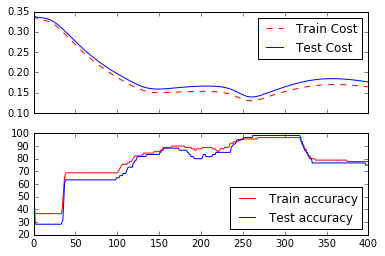

In [12]:
irisNN.fit(iris_train, 0.01, 400, iris_test)

In [13]:
irisNN.accuracy(iris_train),irisNN.accuracy(iris_test)

(77.77777777777779, 75.0)

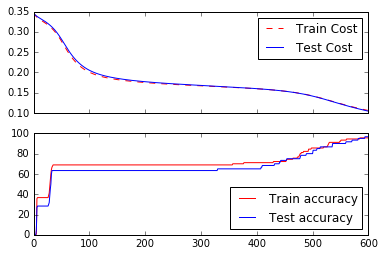

In [14]:
irisNN = NNW([4,8,3])
irisNN.fit(iris_train, 0.005, 600, iris_test)

In [15]:
irisNN.accuracy(iris_train),irisNN.accuracy(iris_test)

(95.55555555555556, 96.66666666666667)

In [16]:
#try fishing dataset
fishing_df = pd.read_excel(
                'fishingData.xlsx', skiprows = 2, header = 0 )
# Enumeric     
fishing = fishing_df.replace(['Strong', 'Weak', 'Warm', 'Moderate', 
                   'Cold','Cool','Sunny','Cloudy','Rainy','Yes','No'], 
                     [1, 2, 3, 4, 5,6,7,8,9,1,0])
                     
fishing_training = fishing.loc[0:13]
fishing_test = fishing.loc[19:19] 

      
fishing_X = fishing_training.ix[:,0:4] 
fishing_X = np.array(fishing_X).astype(np.float32)

fishing_Y = fishing_training.ix[:,4:5]
fishing_Y = np.array(fishing_Y).astype(np.float32)

test = fishing_test.ix[:,0:4]

In [17]:
fishingset = zip(fishing_X,fishing_Y)
fishingset = list(fishingset)
fish_train, fish_test = splitData(fishingset, 0.5)

In [18]:
FN = NNW([4,10,1])

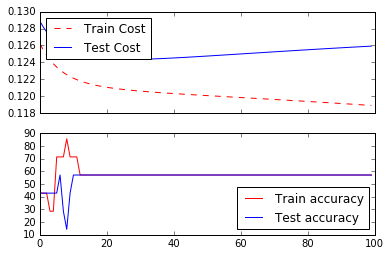

In [19]:
FN.fit(fish_train, 0.05, 100,fish_test)

In [20]:
FN.accuracy(fish_train), FN.accuracy(fish_test)

(57.14285714285714, 57.14285714285714)

In [70]:
fishing_df

,Wind,Water,Air,Forecast,Fish?
0,Strong,Warm,Warm,Sunny,Yes
1,Weak,Warm,Warm,Sunny,No
2,Strong,Warm,Warm,Cloudy,Yes
3,Strong,Moderate,Warm,Rainy,Yes
4,Strong,Cold,Cool,Rainy,No
5,Weak,Cold,Cool,Rainy,No
6,Weak,Cold,Cool,Sunny,No
7,Strong,Moderate,Warm,Sunny,Yes
8,Strong,Cold,Cool,Sunny,Yes
9,Strong,Moderate,Cool,Rainy,No


In [69]:
FN.outcome(test)

array([[ 0.53949203]])

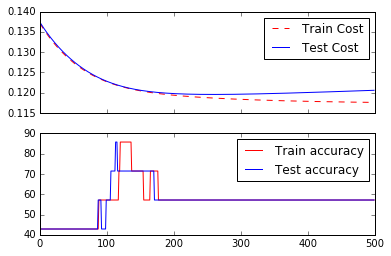

In [21]:
FN = NNW([4,6,1])
FN.fit(fish_train, 0.01, 500,fish_test)

In [22]:
FN.accuracy(fish_train), FN.accuracy(fish_test)

(57.14285714285714, 57.14285714285714)

In [80]:
game_df = pd.read_excel('gameData.xlsx' , skiprows = 2, header = 0)
# Enumeric     
game = game_df.replace(['Good', 'Fair', 'Poor', 'Yes', 'No'], [1.0, 2.0, 3.0, 4.0, 5.0])

trainset = game.loc[0:21]
testset = game.loc[26:30] 

#game
game_X= trainset.ix[:,0:4]
game_X = normalization(game_X)

In [81]:
game_X

,Health,Armor,Weapon,# Enemies
0,-0.386364,-0.590909,0.409091,-0.0909091
1,-0.386364,-0.590909,0.409091,0.159091
2,-0.386364,-0.590909,0.409091,0.409091
3,-0.386364,0.409091,-0.590909,-0.0909091
4,-0.386364,0.409091,-0.590909,0.159091
5,-0.386364,0.409091,-0.590909,0.409091
6,-0.386364,0.409091,0.409091,-0.340909
7,-0.386364,0.409091,0.409091,-0.0909091
8,-0.386364,-0.590909,-0.590909,0.159091
9,0.113636,-0.590909,-0.590909,-0.0909091


In [93]:
# there are four outputs: 0--Attact, 1--Run, 2--Wander, 3--Hide, use 
#(1,0,0,0),(0,1,0,0,),(0,0,1,0),(0,0,0,1)to represent respectively.
game_X = np.array(game_X).astype(np.float32)
datalen = trainset['Action'].shape[0]
game_Y = np.zeros((datalen,4),dtype = 'float32')
for i in range(datalen):
    if trainset['Action'][i]=="Attact":
        game_Y[i][0]=1
    elif trainset['Action'][i]=="Run":
        game_Y[i][1]=1
    elif trainset['Action'][i]=="Wander":
        game_Y[i][2]=1
    elif trainset['Action'][i]=="Hide":
        game_Y[i][3]=1
game_Y = np.array(game_Y)

In [94]:
gameset = zip(game_X,game_Y)
gameset = list(gameset)
game_train, game_test = splitData(gameset, 0.6)

In [95]:
gameNN = NNW([4, 8, 4])

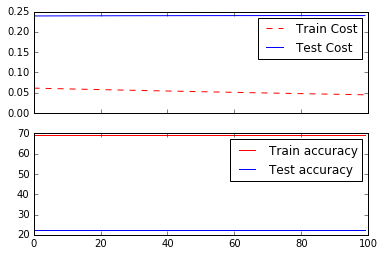

In [111]:
gameNN.fit(game_train,0.1, 100, game_test)

In [112]:
gameNN.accuracy(game_train), gameNN.accuracy(game_test)

(69.23076923076923, 22.22222222222222)

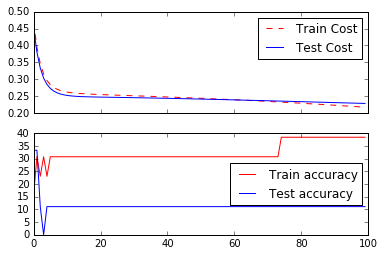

In [98]:
gameNN = NNW([4, 10, 4])
gameNN.fit(game_train,0.1, 100, game_test)

In [99]:
gameNN.accuracy(game_train), gameNN.accuracy(game_test)

(38.46153846153847, 11.11111111111111)

Try wine dataset
-- The attributes are (dontated by Riccardo Leardi, 
	riclea@anchem.unige.it )
 	1) Alcohol
 	2) Malic acid
 	3) Ash
	4) Alcalinity of ash  
 	5) Magnesium
	6) Total phenols
 	7) Flavanoids
 	8) Nonflavanoid phenols
 	9) Proanthocyanins
	10)Color intensity
 	11)Hue
 	12)OD280/OD315 of diluted wines
 	13)Proline            

5. Number of Instances
	class 1 59
	class 2 71
	class 3 48


In [33]:
wine_df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header = None)
#wine_df
wine_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [57]:
# Data without normalization:

wine_X= wine_df.ix[:,1:13]
wine_X = np.array(wine_X).astype(np.float32)

datalen = iris_df[0].shape[0]
wine_Y = np.zeros((datalen,3),dtype = 'float32')

for i in range(datalen):
    if wine_df[0][i]==1:
        wine_Y[i][0]=1
    elif wine_df[0][i]==2:
        wine_Y[i][1]=1
    elif iris_df[0][i]==3:
        wine_Y[i][2]=1

wine_Y = np.array(wine_Y)

wineset = zip(wine_X,wine_Y)
wineset = list(wineset)

#split training and test sets
wine_train, wine_test = splitData(wineset, 0.6)

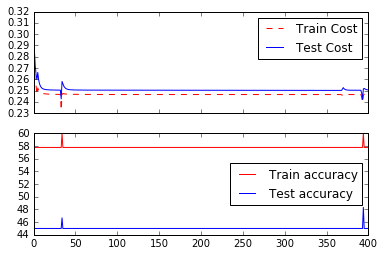

In [58]:
wineNN = NNW([13,6,3])
wineNN.fit(wine_train, 0.02, 400, wine_test)

In [60]:
wineNN.accuracy(wine_train), wineNN.accuracy(wine_test)

(57.77777777777777, 45.0)

In [79]:
def normalization(df):
    df = (df - df.mean()) / (df.max() - df.min())
    return df

In [61]:
# Normalize the dataset

wine_X= wine_df.ix[:,1:13]
wine_X = np.array(wine_X).astype(np.float32)

#Normalize
wine_X = normalization(wine_X)

datalen = iris_df[0].shape[0]
wine_Y = np.zeros((datalen,3),dtype = 'float32')

for i in range(datalen):
    if wine_df[0][i]==1:
        wine_Y[i][0]=1
    elif wine_df[0][i]==2:
        wine_Y[i][1]=1
    elif iris_df[0][i]==3:
        wine_Y[i][2]=1

wine_Y = np.array(wine_Y)

wineset = zip(wine_X,wine_Y)
wineset = list(wineset)

#split training and test sets
wine_train, wine_test = splitData(wineset, 0.6)

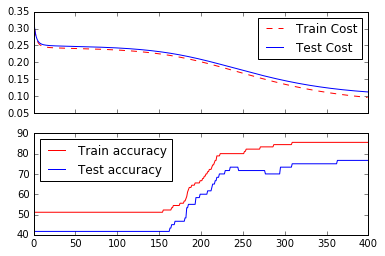

In [62]:
wineNN = NNW([13,6,3])
wineNN.fit(wine_train, 0.02, 400, wine_test)

In [63]:
wineNN.accuracy(wine_train), wineNN.accuracy(wine_test)

(85.55555555555556, 76.66666666666667)

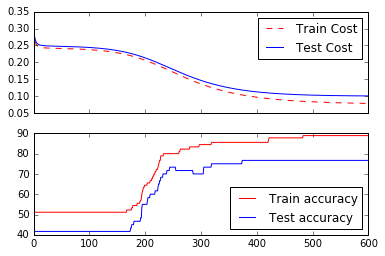

In [64]:
wineNN = NNW([13,8,3])
wineNN.fit(wine_train, 0.02, 600, wine_test)

In [65]:
wineNN.accuracy(wine_train), wineNN.accuracy(wine_test)

(88.88888888888889, 76.66666666666667)

# Discussion

This project tried to construct the neural networks and tried find out the factors that will give the best results.

First of all, we can see the training data size affect the results significantly. As we see, once the weights initialled, they need to adjust after lots of trainning. If the training size is too small, increase the hidden nodes might decrease the training cost but also cause overfittig.

Secondly, the activation value after first hidden node would fall between (0,1), if the initial weights are too large or too small then most neurons would become saturated and the network might barely learn.

Thirdly, this project use online learning, updating the weights instantaneously after every sample. It might not very ideal for very large dataset since it takes longer time to train.

Forthly, the learning rate needs to adjust for different cases, which can tell from the cost curve.

Finally, if the training data has large range then normalization would help to improve the accuracy.